# Анализ полученных данных средствами Python

Получены файлы, в которых содержатся результаты запросов из предыдущих этапов проекта.

query_1.csv — результат первого запроса. В нём содержится информация о:   
- model — модели самолета   
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

query_3.csv — результат третьего запроса. В нём содержится информация о:    
- city — городах
- average_flights — среднее количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат

## Импорт библотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Изучение данных

In [2]:
df1 = pd.read_csv('query_1.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
df1.head(5)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
df2 = pd.read_csv('query_3.csv').sort_values(by = 'average_flights', ascending = False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 43 to 49
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [25]:
df1['flights_amount'].describe()

count       8.000000
mean     2035.625000
std      1965.203947
min       300.000000
25%       605.250000
50%       795.000000
75%      4250.250000
max      4557.000000
Name: flights_amount, dtype: float64

In [5]:
df2.head(5)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581


### Изменение типа данных

In [6]:
df2['average_flights'] = df2['average_flights'].astype('int')

In [7]:
df2.describe().astype('int')

,average_flights
count,101
mean,5
std,13
min,1
25%,2
50%,3
75%,5
max,129


**Вывод по изучению данных:**    
в целом уже видно, что Москва является лидером по количесву рейсов из 101 города. Её пассажиропоток сильно отличается от других городов. В пассажироперевозках занято всего 8 моделей самолётов.   
Медианное количесво рейсов в сентябре 2018г. равно 795, а среднее количесво тех же рейсов 2035, что говорит о смещении вправо. Значит данные распределены неравномерно и чаще встречаються значения от минимума до второго квантиля (300 - 795).
Медианное количсево прибывающих в сентябре 2018г. рейсов равно 3, а среднее равно 5. Что также свидельствует о смещении вправо. При этом максимальное значение равно 129,а минимально 5. Получается что данные сильно искажены.

## топ-10 городов по количеству рейсов

In [8]:
top10 = df2.sort_values(by='average_flights', ascending = False).head(10)
top10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,11
20,Екатеринбург,11
67,Ростов-на-Дону,10
63,Пермь,10
10,Брянск,10
73,Советский,9
84,Ульяновск,9


## Графики: 
 - модели самолетов и количество рейсов
 - города и количество рейсов
 - топ-10 городов и количество рейсов

### Количество рейсов по моделям

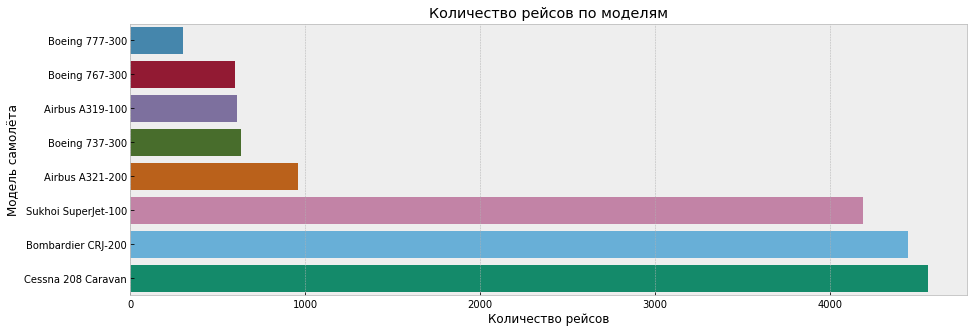

In [38]:
plt.style.use('bmh')
sns.barplot(x="flights_amount", y="model", data=df1.sort_values(by='flights_amount', ascending = True))
plt.title('Количество рейсов по моделям')
plt.xlabel("Количество рейсов")
plt.ylabel("Модель самолёта")
plt.show()

В сентябре 2018 года, больше всех совершили рейсов следующие модели самолётов:
- Sukhoi Superjet-100
- Bombardier CRJ-200
- Cessna 208 Caravan
Каждый из них, в 3 раза больше сделал перелётов, чем например Airbus A321-200.
Но это не означает, что они перевезли большое количество пассажиров, так как пассажировместимость и парк самолётов может сильно отличатся. Дополнительно на пассажироперевозки могут влиять и другие косвенные факторы, такие как: стандарты или политические события.

### Количество рейсов по городам

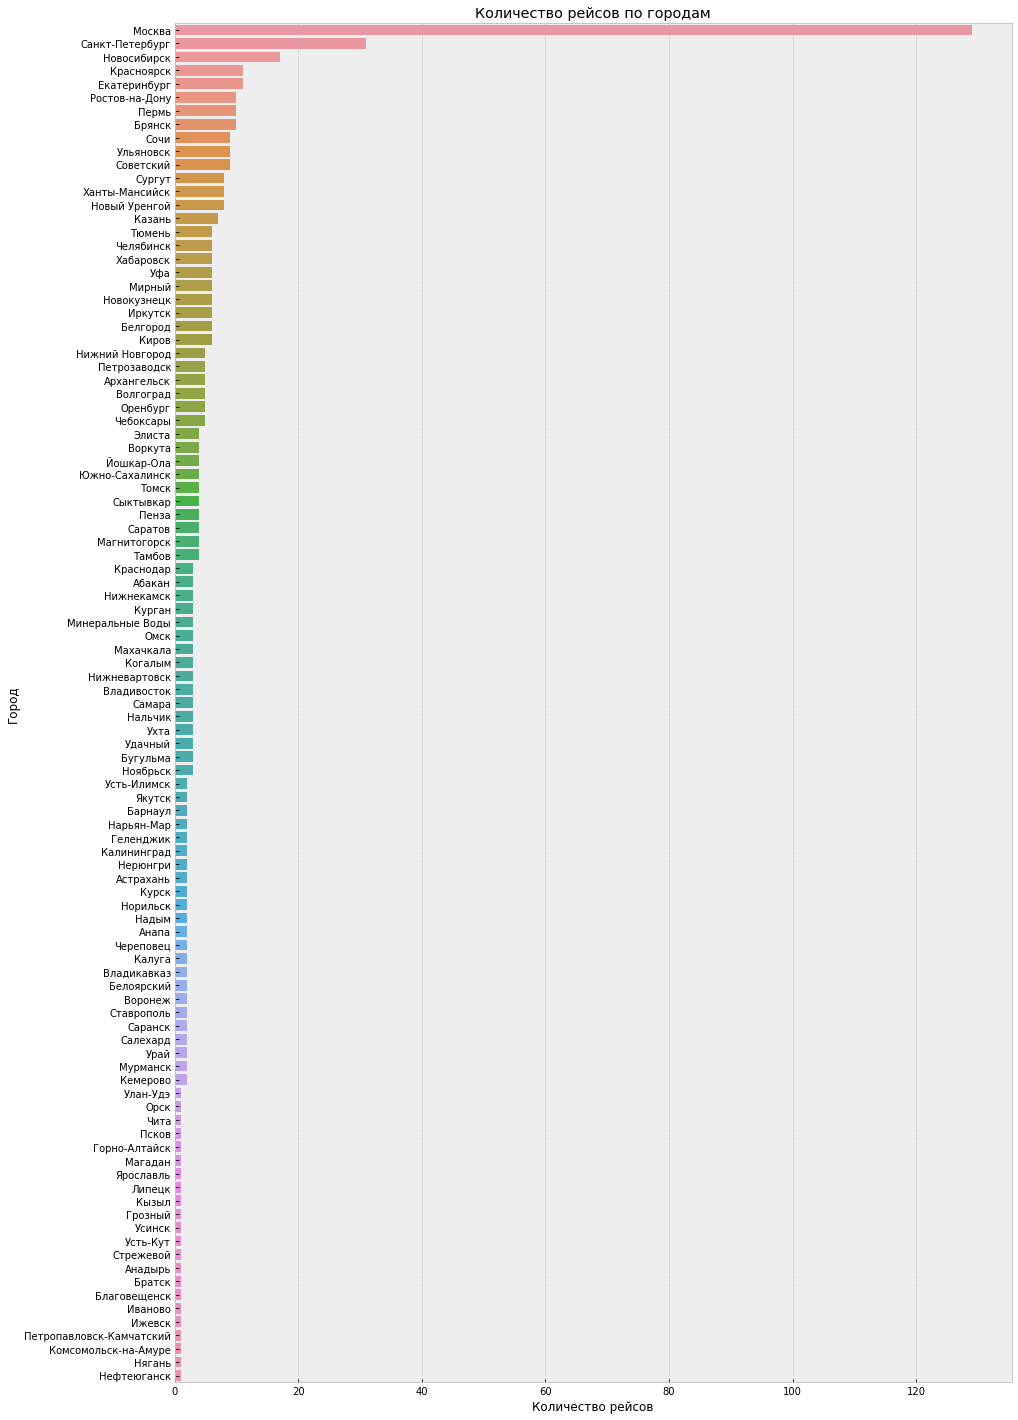

In [43]:
sns.barplot(x='average_flights', y='city', data=df2)
plt.rcParams['figure.figsize']=(15,25)
plt.title('Количество рейсов по городам')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.show()

Традиционно Москва является самым большим транспортным узлом. В среднем аэропорты Москвы принимают около 120 бортов. 
Далее идёт Санкт-Петербург с количеством 31 борт и Новосибирск с количеством 17 прилетающих бортов.
Меньше всего принимают бортов либо слишком отдалённые от Москвы города либо не самые популярные аэропорты. Например, Ярославль не так далеко располагается от Москвы, туда возможно проще добраться другим транспортом. А вот Нефтьюганск небольшой промышленный город, располагается от Москвы в 3000 км. туда сложно добраться на автомобиле. Население примерно 130т. человек. Всего скорее туда совершаются деловые поездки вахтовым методом, нежели развлекательные.

### Топ 10 городов по количеству рейсов

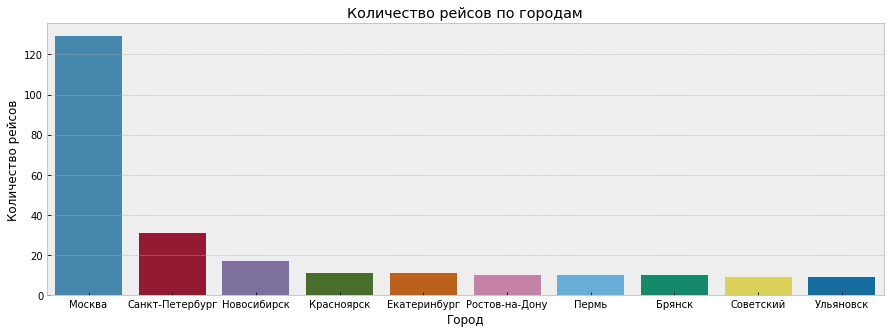

In [45]:
sns.barplot(x='city', y='average_flights', data=top10)
plt.rcParams['figure.figsize']=(15,5)
plt.title('Количество рейсов по городам')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

В топ-10 городов первую строчку занимает Москва, далее идет с отрывом более чем в 4 раза - Санкт-Петербург, в Новосибирск почти в 2 раза меньше рейсов чем в Санкт-Петербург.


## Вывод 

В ходе проекта:
- открыты файлы с данными и изучена общая информация, а также предоставлен по ним вывод.
- произведено изменение типа данных
- проведен исследовательский анализ данных:

В сентябре 2018 года, больше всех совершили рейсов следующие модели самолётов:
- Sukhoi Superjet-100
- Bombardier CRJ-200
- Cessna 208 Caravan
Каждый из них, в 3 раза больше сделал перелётов, чем например Airbus A321-200.
Но это не означает, что они перевезли большое количество пассажиров, так как пассажировместимость и парк самолётов может сильно отличатся. Дополнительно на пассажироперевозки могут влиять и другие косвенные факторы, такие как: стандарты или политические события.

ТОП-3 городов:
- Москва
- Санкт-Петербург
- Новосибирск.

По имеющимся данным сложно сделать вывод - "где проходят крупнейшие фестивали и как это влияет на авиаперевозку пассажиров", необходимо больше данных. Так как на данный момент мы не располагаем количеством пассажиропотока, количеством посещений фестивалей хотя бы за предыдущий год.    
Допольнительно из пункта "Изучение данных" видно, что данные сильно искажены, что может сильно повлиять на результаты дальнейшего исседования.